<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters With the Iris Data Set

_Authors: Joseph Nelson (DC)_

---

In the following lab, you will practice using k-means clustering and the various evaluation strategies we covered on the iris data set.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

### 1) Import and format the data.

Both scikit-learn and Seaborn offer ways to import the iris data:
- `sklearn.datasets.load_iris()`
- `sns.load_dataset("iris")`

The Seaborn method is easier.

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2) Plot the data to visually estimate to correct number of clusters.

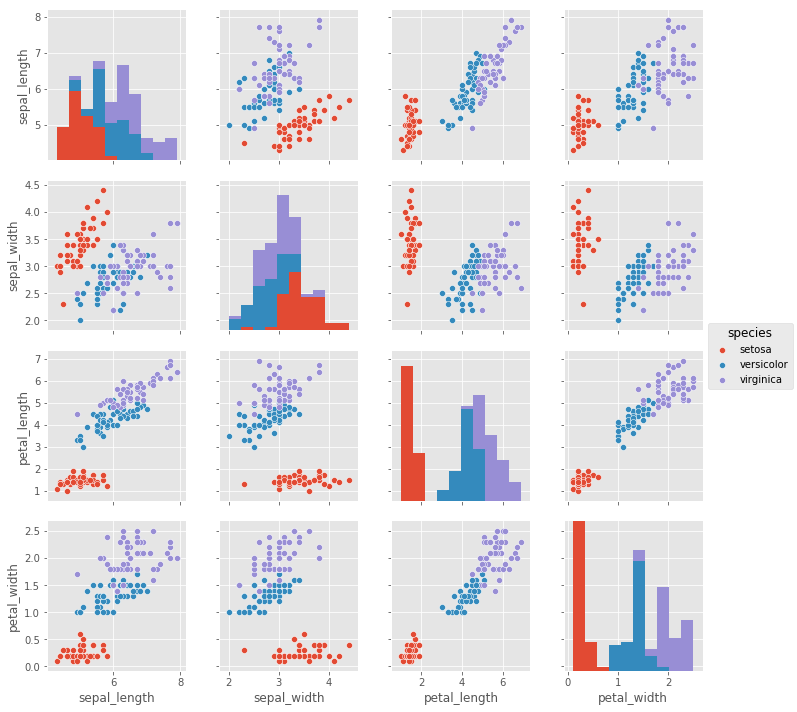

In [67]:
sns.pairplot(iris, hue='species')

### 3) Cluster the data using k-means.

- Select a number of clusters based on your visual analysis above.

Predicted clusters to points:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Location of centroids: 
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


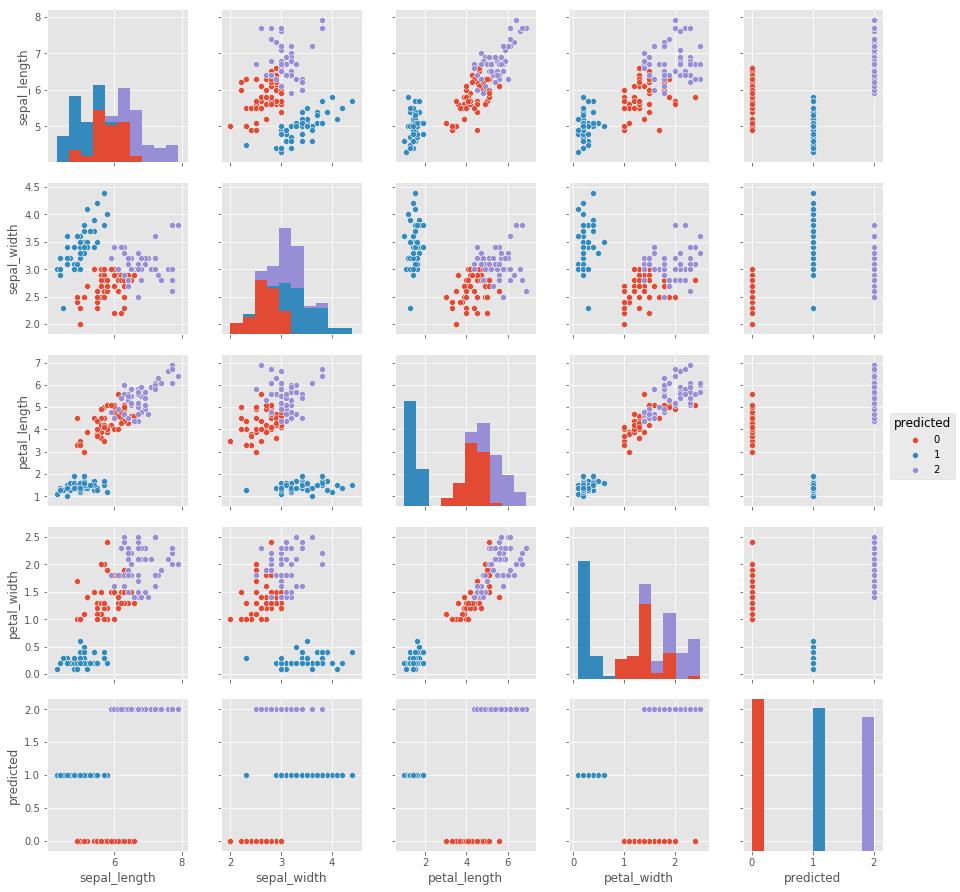

In [4]:
from sklearn.cluster import KMeans, k_means
from sklearn.preprocessing import StandardScaler

X = iris.drop('species', axis=1)

Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns.values)

model = KMeans(n_clusters=3, random_state=0).fit(Xs)
predicted = model.labels_
centroids = model.cluster_centers_
X['predicted'] = predicted #or X['predicted'] = predicted
print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

sns.pairplot(X, hue='predicted') #or use X

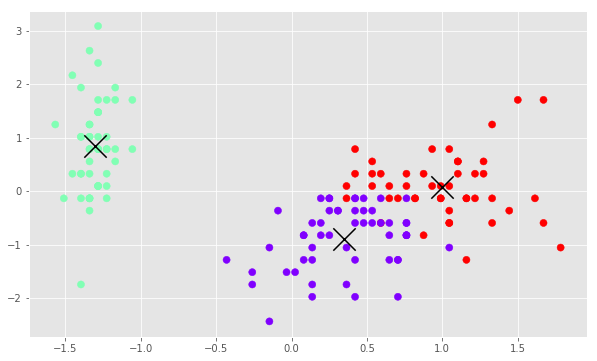

In [10]:
Xs['predicted'] = predicted
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(Xs.iloc[:, 0], Xs.iloc[:, 1], c=predicted, s=50, cmap='rainbow');
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10);

**3.A) Compute the labels and centroids.**

In [7]:
k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(Xs)

### 4) Visually evaluate the clusters.
- Compare the predicted labels versus the actual labels.

In [47]:
X.predicted.value_counts()

0    53
1    50
2    47
Name: predicted, dtype: int64

### 5) Check the centroids and plot them along two of the features.

In [8]:
import seaborn as sns
from sklearn.cluster import KMeans, k_means
from sklearn.preprocessing import StandardScaler

%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

iris = sns.load_dataset("iris")
X = iris.drop('species', axis=1)
Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns = X.columns.values)

In [14]:
# Run k-means
k = 3
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(Xs)
centroids = kmeans.cluster_centers_

In [34]:
centroids

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [10]:
# # Fix permuted labels
# from scipy import stats
# labels = np.zeros_like(clusters)
# for i in range(4):
#     mask = (clusters == i)
#     labels[mask] = stats.mode(Xs.predicted[mask])[0]

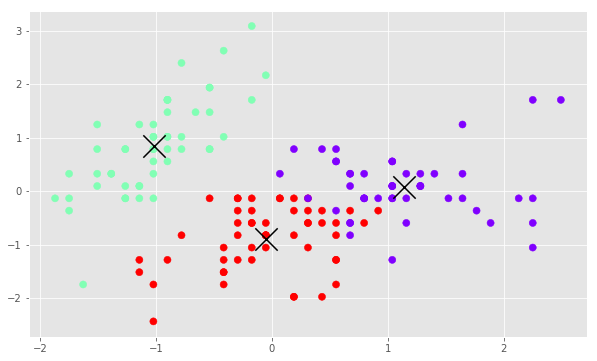

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(Xs.iloc[:, 0], Xs.iloc[:, 1], c=clusters, s=50, cmap='rainbow');
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10);

### 6) Compute the silhouette score for your clusters.

What does the score indicate?

In [8]:
# A:

### 7) Plot the silhouette score for `k` = `2`, `3`, `4`, `5`, `6`, `7`, `8`.

You will need to fit a new model for each one. You can either standardize your data before iterating through the clusters or not — it’s up to you.

In [15]:
from sklearn.metrics import silhouette_score
def opt_clusters(X, scaling=StandardScaler, k=11):
    #choosing clusters with elbow within cluster sum square errors and silhouette score
    inertia = []
    silh = []
    #standardizing required
    Xs = StandardScaler().fit_transform(X)
    Xs = pd.DataFrame(Xs, columns = X.columns.values)
    for i in range(1,k):
        model = KMeans(n_clusters=i, random_state=0).fit(Xs)
        predicted = model.labels_
        inertia.append(model.inertia_)#low inertia = low cluster sum square error. Low inertia -> Clusters are more compact.
        if i>1:
            silh.append(silhouette_score(Xs, predicted, metric='euclidean')) #High silhouette score = clusters are well separated. The score is based on how much closer data points are to their own clusters (intra-dist) than to the nearest neighbor cluster (inter-dist): (cohesion + separation).  
    plt.plot(np.arange(1, k, step=1), inertia)
    plt.title('Innertia vs clusters')
    plt.xlabel('No. of clusters')
    plt.ylabel('Within Clusters Sum-sq (WCSS)')
    plt.show()
    plt.scatter(np.arange(2, k, step=1), silh)
    plt.title('Sihouette vs clusters')
    plt.xlabel('No. of clusters')
    plt.ylabel('Silhouette')
    plt.show()

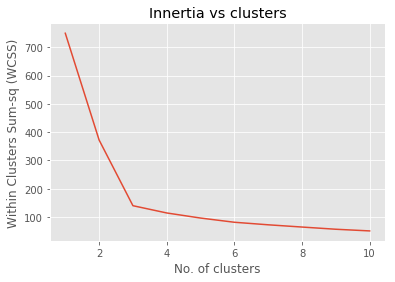

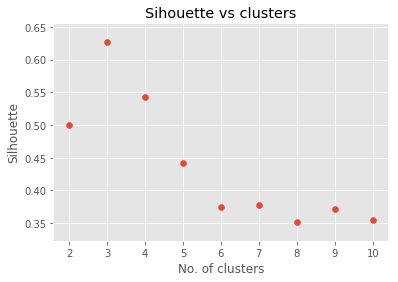

In [17]:
opt_clusters(X, k=11)

In [18]:
X['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [19]:
X['species'] = iris['species']
X['species2'] = X['species'].map(lambda x: 1 if x == "setosa" else 0 if x == "versicolor" else 2)
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted,species,species2
0,5.1,3.5,1.4,0.2,1,setosa,1
1,4.9,3.0,1.4,0.2,1,setosa,1
2,4.7,3.2,1.3,0.2,1,setosa,1
3,4.6,3.1,1.5,0.2,1,setosa,1
4,5.0,3.6,1.4,0.2,1,setosa,1


In [20]:
X['species2'].value_counts()

2    50
1    50
0    50
Name: species2, dtype: int64

,predicted_virginica,predicted_setosa,predicted_versicolor
virginica,39,0,11
setosa,0,50,0
versicolor,14,0,36


In [29]:
from sklearn.metrics import classification_report
print(classification_report(X['species2'], X['predicted']))

             precision    recall  f1-score   support

          0       0.74      0.78      0.76        50
          1       1.00      1.00      1.00        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



### 8) Plot the inertia score for the different k clusters.

Is there an elbow to select a good number of clusters?

In [10]:
# A:

### 9) Fit a k-means with three clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster zero should roughly correspond to species zero, cluster one to species one, and cluster two to species two, etc.

In [30]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted,species,species2
0,5.1,3.5,1.4,0.2,1,setosa,1
1,4.9,3.0,1.4,0.2,1,setosa,1
2,4.7,3.2,1.3,0.2,1,setosa,1
3,4.6,3.1,1.5,0.2,1,setosa,1
4,5.0,3.6,1.4,0.2,1,setosa,1


In [33]:
X.groupby('species').median()['predicted']

species
setosa        1
versicolor    0
virginica     2
Name: predicted, dtype: int32

In [45]:
import scipy.stats as stats
species_dict = {}
for specie in X['species'].unique():
   mode = int(stats.mode(X[X['species'] == specie]['predicted'])[0])
   species_dict[specie] = mode
species_dict

{'setosa': 1, 'versicolor': 0, 'virginica': 2}

### 10) Calculate the completeness, homogeneity, v measure, and mutual information (adjusted) using the predicted clusters and the true labels.

In [37]:
from sklearn.metrics import completeness_score
completeness_score(X['species2'], X['predicted'])

0.6598476779627759

In [38]:
from sklearn.metrics import homogeneity_score
homogeneity_score(X['species2'], X['predicted'])

0.6591265018049008

In [39]:
from sklearn.metrics import v_measure_score
v_measure_score(X['species2'], X['predicted'])

0.659486892724918

In [40]:
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score

print(mutual_info_score(X['species2'], X['predicted']))
print(adjusted_mutual_info_score(X['species2'], X['predicted']))

0.724124474669687
0.6548603058807271
